In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 98% !important }<style>"))

# Analysis

In [2]:
from utilities import *
from models import *

In [3]:
import joblib

In [4]:
ble = read_ble("../Data/ble.csv")

In [5]:
pin_file = "../Data/pin.csv"
pin = read_pin(pin_file)

In [6]:
testPin_file = "../Data/testPin.csv"
testPin = read_pin(testPin_file)

In [7]:
filename = "../Data/rssi5.csv"
B1 = "0117C55D14E4"

data = read_data(filename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [8]:
data[scanners] = min_max_scaling(data[scanners])

In [9]:
testFilename = "../Data/testRssi.csv"
B1 = "0117C55D14E4"

test = read_data(testFilename, B1)

All beacons: ['0117C55D14E4']
Selecting 0117C55D14E4


In [10]:
test[scanners] = min_max_scaling(test[scanners])

In [11]:
autoencoder = tf.keras.models.load_model("../Models/Autoencoder_Simple.h5")

In [12]:
data

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.466667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.350000,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.533333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49658,2019-12-12 01:47:54.481,V1_26,0.516667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49659,2019-12-12 01:47:54.683,V1_26,NaN,NaN,NaN,0.383333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49660,2019-12-12 01:47:54.736,V1_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.683333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49661,2019-12-12 01:47:54.772,V1_26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.266667,NaN,NaN,NaN,NaN


## Train Validation Split

In [13]:
train, validation = train_validation_split(data)

In [14]:
train.groupby("location")[scanners].count()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
location,,,,,,,,,,,,,,,,,
V1_10,281,151,102,258,232,95,98,339,0,213,123,161,257,382,193,4,284
V1_11,62,84,102,125,149,104,83,122,153,62,72,174,161,43,52,27,107
V1_12,91,100,71,123,104,105,72,72,207,63,91,199,156,107,139,75,89
V1_13,88,176,65,146,57,115,136,146,324,18,53,144,117,128,190,20,80
V1_14,43,200,63,107,77,117,342,84,266,19,137,63,104,127,224,91,116
V1_18,81,30,61,113,59,45,35,292,3,93,49,75,71,298,36,0,209
V1_19,381,123,114,195,316,107,75,403,51,178,62,185,332,390,142,117,281
V1_20,139,140,124,102,152,112,85,104,108,46,84,116,223,19,110,28,93
V1_21,88,183,100,98,126,118,162,68,187,28,120,122,110,80,119,89,82


In [15]:
train.shape

(39730, 19)

In [16]:
validation.shape

(9933, 19)

## Change Location to Coordinates

In [17]:
train = train.groupby("location").rolling(30, min_periods=1).mean().reset_index()
validation = validation.groupby("location").rolling(30, min_periods=1).mean().reset_index()
test = test.groupby("location").rolling(30, min_periods=1).mean().reset_index()

In [18]:
train = train.set_index("location").groupby("location").ffill().reset_index()
validation = validation.set_index("location").groupby("location").ffill().reset_index()
test = test.set_index("location").groupby("location").ffill().reset_index()

In [19]:
train.fillna(0, inplace=True)
validation.fillna(0, inplace=True)
test.fillna(0, inplace=True)
train[scanners] = autoencoder.predict(train[scanners].values)
validation[scanners] = autoencoder.predict(validation[scanners].values)
test[scanners] = autoencoder.predict(test[scanners].values)

In [20]:
train["X"] = train["location"].apply(lambda x: pin[x]["X"])
train["Y"] = train["location"].apply(lambda x: pin[x]["Y"])

In [21]:
validation["X"] = validation["location"].apply(lambda x: pin[x]["X"])
validation["Y"] = validation["location"].apply(lambda x: pin[x]["Y"])

In [22]:
test["X"] = test["location"].apply(lambda x: testPin[x]["X"])
test["Y"] = test["location"].apply(lambda x: testPin[x]["Y"])

In [23]:
train

,location,level_1,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,...,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
0,V1_10,30939,0.286619,0.190082,0.216187,0.097568,0.299413,0.324725,-0.045556,0.249879,...,0.101409,0.380291,0.224135,0.110041,0.387468,0.427582,0.140401,0.230670,11.17660,5.29753
1,V1_10,33181,0.432512,0.188859,0.196267,0.091558,0.298765,0.259593,-0.063348,0.401138,...,0.080080,0.395126,0.186066,0.169564,0.412555,0.354599,0.105074,0.197033,11.17660,5.29753
2,V1_10,30351,0.391907,0.164596,0.230562,0.087227,0.269433,0.232727,-0.016785,0.390524,...,0.083383,0.378417,0.202581,0.172134,0.412556,0.631218,0.147367,0.186094,11.17660,5.29753
3,V1_10,30605,0.391907,0.164596,0.230562,0.087227,0.269433,0.232727,-0.016785,0.390524,...,0.083383,0.378417,0.202581,0.172134,0.412556,0.631218,0.147367,0.186094,11.17660,5.29753
4,V1_10,32825,0.383860,0.140745,0.235497,0.079700,0.257151,0.218125,-0.021645,0.404691,...,0.091093,0.373377,0.196308,0.131953,0.397978,0.601183,0.174416,0.533771,11.17660,5.29753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39725,V1_9,41146,0.483163,0.381401,0.306592,0.638743,0.406060,0.198600,0.207803,0.614405,...,0.176259,0.247919,0.540572,0.397357,0.453309,0.385347,0.092644,0.365008,8.17867,5.28213
39726,V1_9,40431,0.483438,0.381157,0.306576,0.638878,0.405829,0.197791,0.208079,0.613678,...,0.176264,0.254543,0.540400,0.396622,0.453521,0.384767,0.092761,0.364868,8.17867,5.28213
39727,V1_9,41022,0.483213,0.380494,0.306713,0.638666,0.405489,0.197386,0.207945,0.614070,...,0.176479,0.254403,0.540227,0.395504,0.453116,0.383932,0.093513,0.374526,8.17867,5.28213
39728,V1_9,42583,0.486863,0.380824,0.305710,0.638432,0.399702,0.195889,0.206982,0.618296,...,0.176061,0.255104,0.539095,0.397515,0.453759,0.382810,0.091479,0.374045,8.17867,5.28213


## Model Training

In [24]:
X_train, y_train = train[scanners].values, train[["X", "Y"]].values
X_validation, y_validation = validation[scanners].values, validation[["X", "Y"]].values
X_test, y_test = test[scanners].values, test[["X", "Y"]].values

In [25]:
model = MLPRegressor(model_type='special')

In [26]:
history = model.fit(X_train, y_train, X_test, y_test)

Train on 39730 samples, validate on 8458 samples
Epoch 1/2000
39730/39730 [==============================] - 1s 37us/sample - loss: 38.8951 - mae: 3.9267 - mse: 38.8084 - val_loss: 3.6256 - val_mae: 1.4481 - val_mse: 3.5396
Epoch 2/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 2.6094 - mae: 1.2377 - mse: 2.5152 - val_loss: 3.3664 - val_mae: 1.3914 - val_mse: 3.2655
Epoch 3/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 2.2114 - mae: 1.1116 - mse: 2.1039 - val_loss: 3.2296 - val_mae: 1.3742 - val_mse: 3.1153
Epoch 4/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 2.0008 - mae: 1.0401 - mse: 1.8791 - val_loss: 3.0110 - val_mae: 1.3228 - val_mse: 2.8813
Epoch 5/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 1.8168 - mae: 0.9722 - mse: 1.6786 - val_loss: 3.2008 - val_mae: 1.4079 - val_mse: 3.0544
Epoch 6/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 1

Epoch 48/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.6505 - mae: 0.4695 - mse: 0.4764 - val_loss: 2.0591 - val_mae: 1.0904 - val_mse: 1.8850
Epoch 49/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.6450 - mae: 0.4667 - mse: 0.4713 - val_loss: 2.0240 - val_mae: 1.0956 - val_mse: 1.8502
Epoch 50/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.6404 - mae: 0.4640 - mse: 0.4668 - val_loss: 2.3055 - val_mae: 1.1956 - val_mse: 2.1322
Epoch 51/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.6373 - mae: 0.4630 - mse: 0.4640 - val_loss: 1.9709 - val_mae: 1.0719 - val_mse: 1.7980
Epoch 52/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.6327 - mae: 0.4598 - mse: 0.4598 - val_loss: 2.0987 - val_mae: 1.0981 - val_mse: 1.9258
Epoch 53/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.6286 - mae: 0.4585 - mse: 0.4561 - val_loss:

39730/39730 [==============================] - 1s 17us/sample - loss: 0.5164 - mae: 0.3987 - mse: 0.3534 - val_loss: 2.0191 - val_mae: 1.0899 - val_mse: 1.8564
Epoch 96/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.5153 - mae: 0.3976 - mse: 0.3526 - val_loss: 2.1469 - val_mae: 1.1375 - val_mse: 1.9843
Epoch 97/2000
39730/39730 [==============================] - 1s 16us/sample - loss: 0.5125 - mae: 0.3971 - mse: 0.3501 - val_loss: 2.2799 - val_mae: 1.1809 - val_mse: 2.1174
Epoch 98/2000
39730/39730 [==============================] - 1s 17us/sample - loss: 0.5115 - mae: 0.3953 - mse: 0.3492 - val_loss: 2.1691 - val_mae: 1.1400 - val_mse: 2.0069
Epoch 99/2000
39730/39730 [==============================] - 1s 21us/sample - loss: 0.5105 - mae: 0.3943 - mse: 0.3484 - val_loss: 2.1207 - val_mae: 1.1206 - val_mse: 1.9584
Epoch 100/2000
39730/39730 [==============================] - 1s 19us/sample - loss: 0.5078 - mae: 0.3928 - mse: 0.3458 - val_loss: 2.0029 - val

Epoch 142/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.4511 - mae: 0.3630 - mse: 0.2962 - val_loss: 1.9644 - val_mae: 1.0703 - val_mse: 1.8095
Epoch 143/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.4502 - mae: 0.3626 - mse: 0.2954 - val_loss: 2.0190 - val_mae: 1.0757 - val_mse: 1.8644
Epoch 144/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.4483 - mae: 0.3608 - mse: 0.2938 - val_loss: 2.0251 - val_mae: 1.0830 - val_mse: 1.8708
Epoch 145/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.4483 - mae: 0.3608 - mse: 0.2940 - val_loss: 1.9660 - val_mae: 1.0690 - val_mse: 1.8120
Epoch 146/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.4476 - mae: 0.3607 - mse: 0.2935 - val_loss: 1.9845 - val_mae: 1.0753 - val_mse: 1.8303
Epoch 147/2000
39730/39730 [==============================] - 1s 15us/sample - loss: 0.4460 - mae: 0.3601 - mse: 0.2919 - val

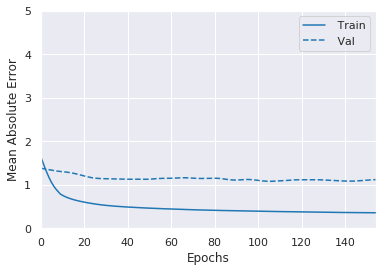

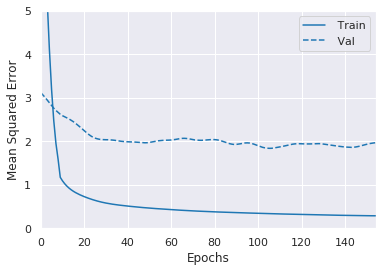

In [27]:
model.show_history()

## Model Validation

9933/1 - 0s - loss: 0.5914 - mae: 0.5193 - mse: 0.8264
Validation loss: 0.9790618650852991
Mean absolute error: 0.5192807
Mean squared error: 0.82643753
Average distance error: 0.8371737578366457


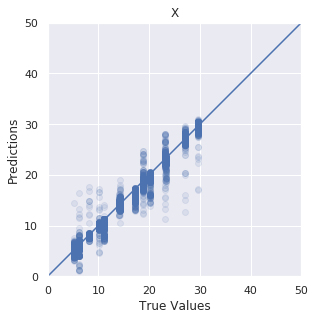

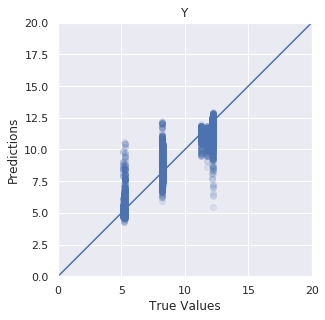

In [28]:
model.model_validation(X_validation, y_validation)

## Model Testing

8458/1 - 0s - loss: 2.5987 - mae: 1.1390 - mse: 2.0077
Test loss: 2.160293097134092
Mean absolute error: 1.1390342
Mean squared error: 2.0076687
Average distance error: 1.7690069146693717


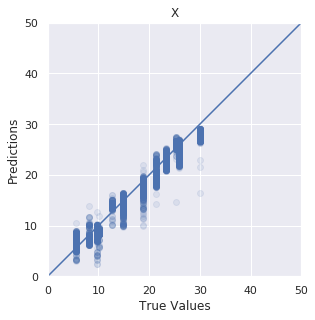

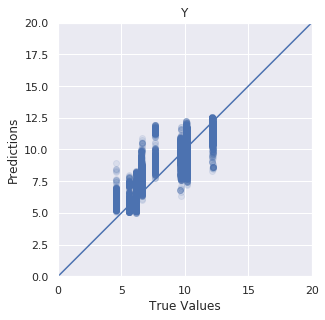

In [29]:
model.model_testing(X_test, y_test)

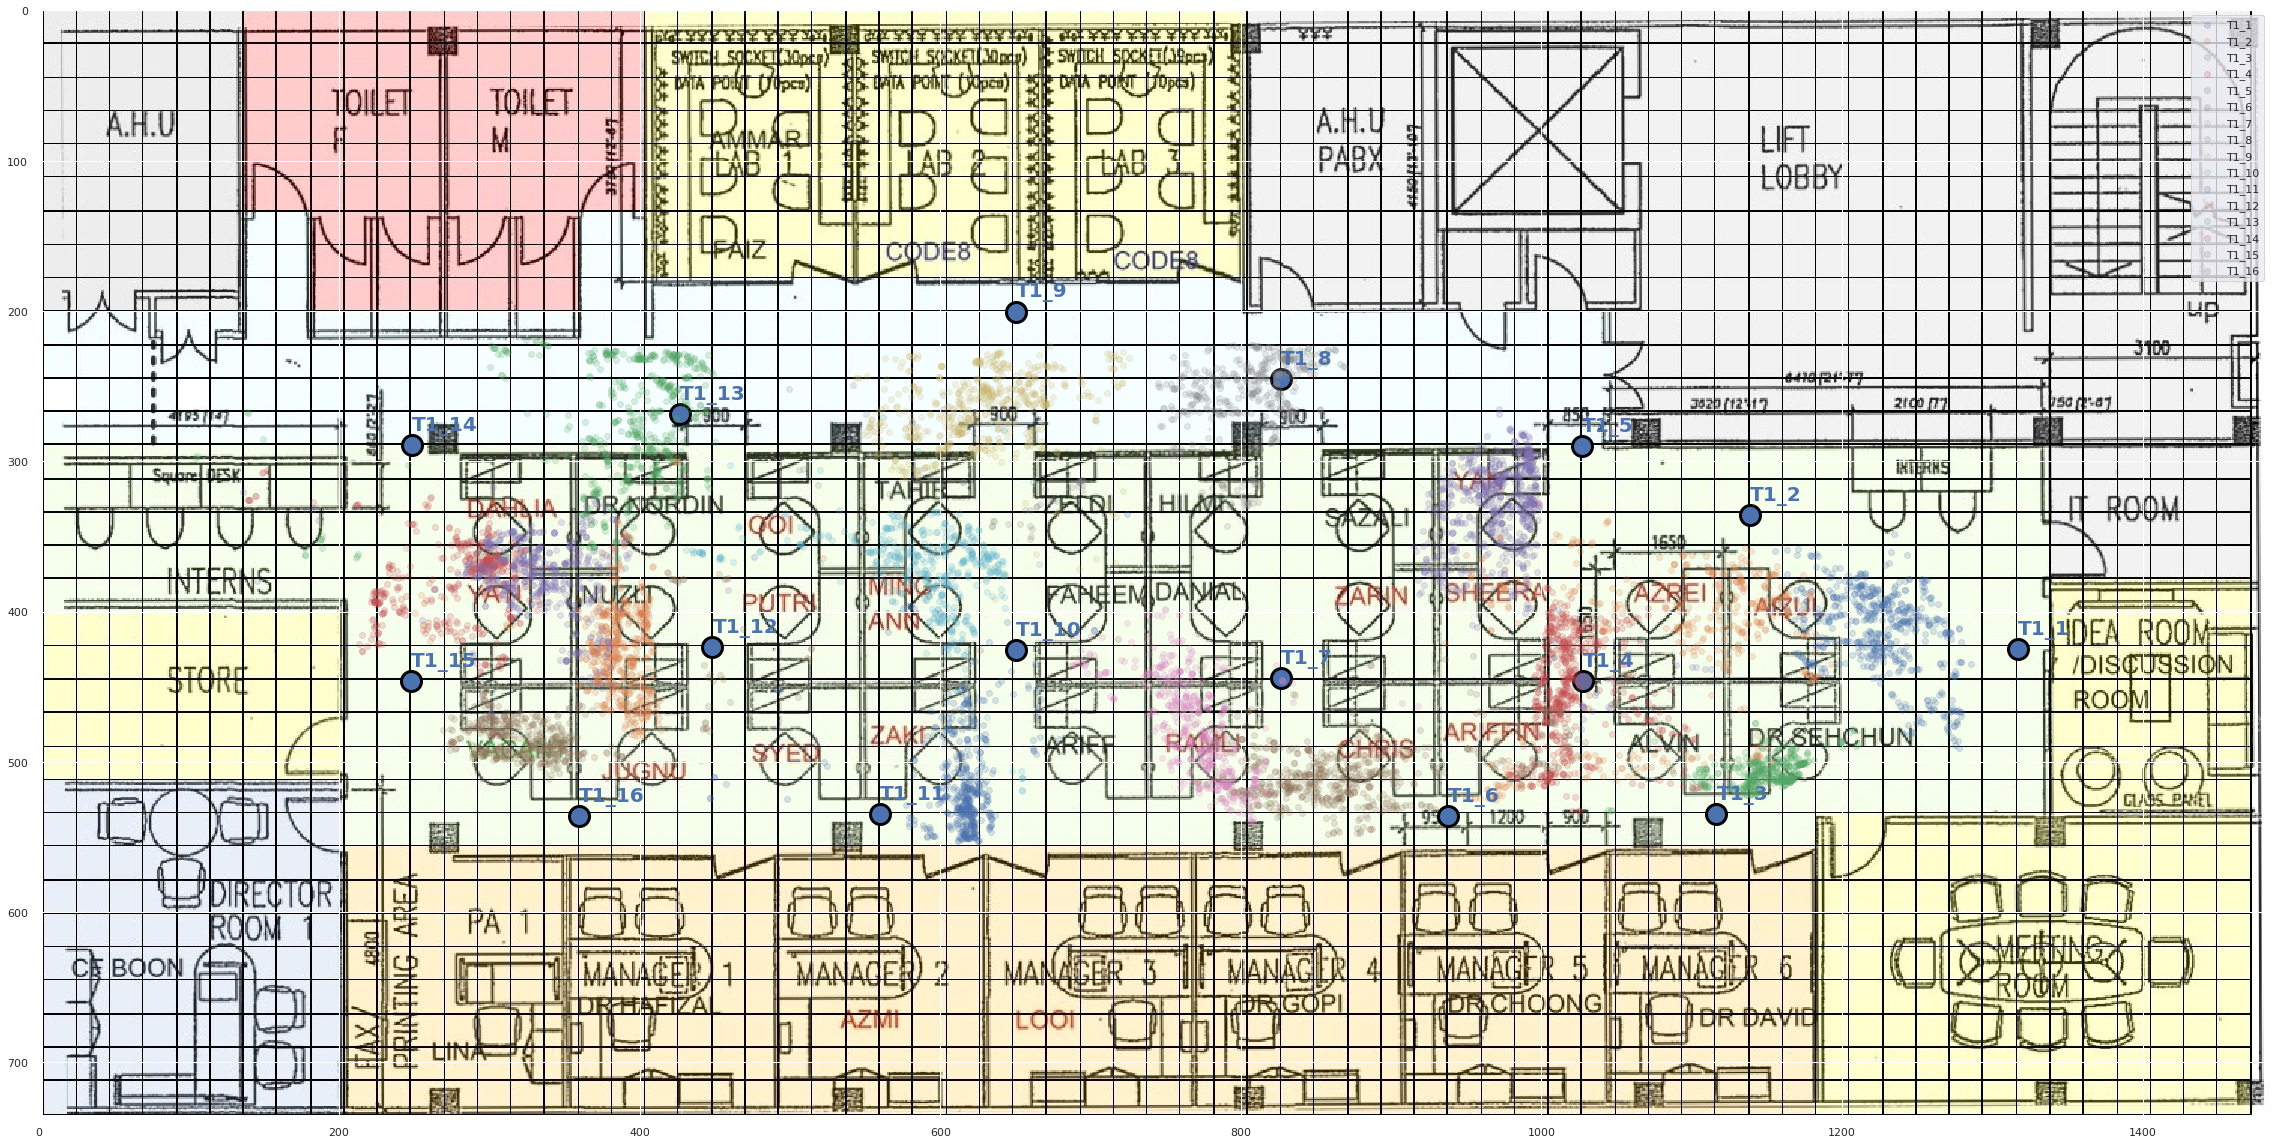

In [30]:
img =  mpimg.imread('../Map/main.png')
fingerprint_color = "r"
testdata_color = "b"
plt.figure(figsize=(40,40))
plt.imshow(img)

labels = ["V1_23", "V1_24", "V1_32", "V1_22", "V1_14", "V1_13", "V1_12", "V1_21", "V1_29", "V1_30", "V1_31", "V1_11", "V1_20", "V1_28", "V1_10", "V1_19", "V1_27", "V1_9", "V1_8", "V1_18", "V1_26"]
x = [27.151600, 29.594400, 29.689400, 23.153700, 23.169100, 20.171700, 17.173201, 18.712299, 18.691700, 23.244200, 27.133301, 14.063600, 14.159800, 14.250300, 11.176600, 10.162500, 10.141900, 8.178670, 5.180690, 6.164600, 6.255650]
y = [8.159480, 8.172020, 11.286000, 8.250140, 5.247920, 5.121330, 5.217130, 8.227330, 12.230300, 12.253700, 11.717700, 5.312350, 8.203950, 12.207500, 5.297530, 8.183420, 12.186400, 5.282130, 5.266730, 8.274090, 12.166400]
x = np.array(x) * 44
y = np.array(y) * 44

testLabels = ["T1_1", "T1_2", "T1_3", "T1_4", "T1_5", "T1_6", "T1_7", "T1_8", "T1_9", "T1_10", "T1_11", "T1_12", "T1_13", "T1_14", "T1_15", "T1_16"]
testX = [29.934250, 25.877805, 25.372470, 23.355726, 23.333564, 21.316819, 18.790348, 18.790348, 14.779021, 14.779021, 12.717952, 10.191480, 9.703916, 5.648265, 5.626103, 8.174736]
testY = [9.659024, 7.630801, 12.155781, 10.139037, 6.593112, 12.177943, 10.094712, 5.573659, 4.554205, 9.673634, 12.155781, 9.629310, 6.105547, 6.570950, 10.139037, 12.177943]
testX = np.array(testX) * 44
testY = np.array(testY) * 44

# plt.scatter(x, y, s=400, c=fingerprint_color, edgecolors="black", linewidths=3)
plt.scatter(testX, testY, s=400, c=testdata_color, edgecolors="black", linewidths=3)

# for i in range(len(labels)):
#     plt.annotate(labels[i], (x[i], y[i] - 10), fontsize=20, color=fingerprint_color, weight='bold')

for j in range(len(testLabels)):
    plt.annotate(testLabels[j], (testX[j], testY[j] - 10), fontsize=20, color=testdata_color, weight='bold')

for i in range(len(testLabels)):
    loc = testLabels[i]
    test_loc = test[test['location'] == loc]
    X_loc = test_loc[scanners].values
    locs = model.predict(X_loc) * 44
    plt.scatter(locs[:, 0], locs[:, 1], alpha=0.2, label=testLabels[i])
plt.legend()